In this session, I plan do some text analysis about the Review text. In the final part, I plan to build a text classifier using encoding techniques.

## Dataset:
The dataset comes from kaggle's [Women review of clothes](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/downloads/womens-ecommerce-clothing-reviews.zip/1)

## Why I choose Kaggle's dataset?
* I am too lasy to collect my own :). 
* It is really time consuming and annoying to collect data with such high quality and quantity 

## TODO
* EDAs
* Convert text into some kind of encoding.
* Building a text classifier

## Task
For each review text, I will be trying to build a classifier in telling whether this text suggest us to recommend or not. Before the classification process, I should perform some

In [1]:
## Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# EDAs
I will look into some of the basic features like distribution, unique values..., etc.

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Since we are mostly dealing with text or categorical data, not Interval data. It seems useless to summarize the int data with statistics.

In [5]:
df[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13993,Love it!,136
Division Name,3,General,13850
Department Name,6,Tops,10468
Class Name,20,Dresses,6319


## Recommend Index
I will see how many entries of reivew recommends the good.

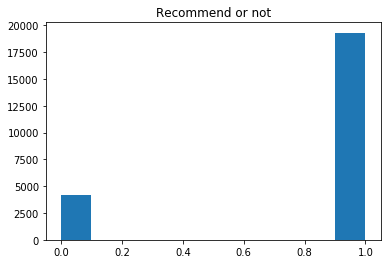

0s: 4172
1s: 19314


In [6]:
plt.hist(df["Recommended IND"])
plt.title("Recommend or not")
plt.show()
print("0s:",sum(df["Recommended IND"]==0))
print("1s:",sum(df["Recommended IND"]==1))

From the above statistics, we see that it is a rather biased sample. Since we have roughly 4 times the recommended data than the not recommend data.

## Ages:
Now as previous mentioned, we will focus on different age groups see how their response differs.

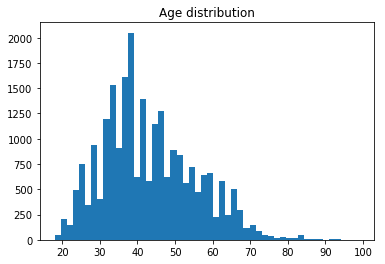

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [7]:
ages = df["Age"]
plt.hist(ages,bins=50)
plt.title("Age distribution")
plt.show()
ages.describe()

It seems to me that this follows a normal distribution of age. What we might found interesting is the 50% quantile of the response. I thought it might be some age close to 30- 35 but it turns out to be some age close to 41.

## Positive Feedback count


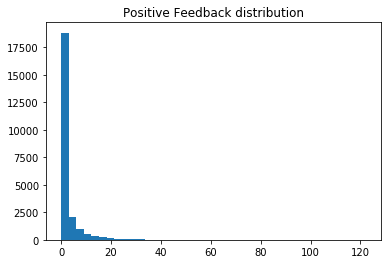

In [8]:
plt.hist(df["Positive Feedback Count"],bins=40)
plt.title("Positive Feedback distribution")
plt.show()

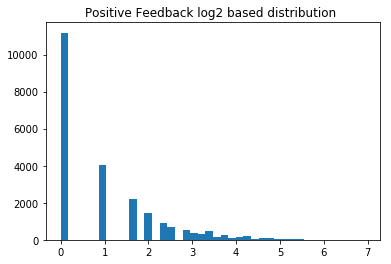

In [9]:
plt.hist(np.log2(df["Positive Feedback Count"]+1),bins=40)
plt.title("Positive Feedback log2 based distribution ")
plt.show()

## Ratings Distribution

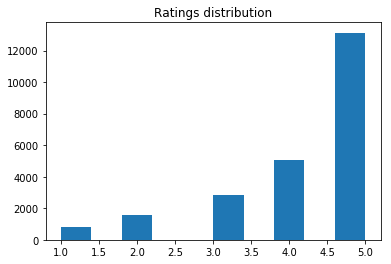

In [10]:
ratings = df["Rating"]
plt.hist(ratings)
plt.title("Ratings distribution")
plt.show()

From the distribution of ratings, we see that the majority of the ratings are more than 4 points.

In [11]:
for i in df:
    print(i,'has different unique values:',len(set(df[i][:])))    

Unnamed: 0 has different unique values: 23486
Clothing ID has different unique values: 1206
Age has different unique values: 77
Title has different unique values: 13994
Review Text has different unique values: 22635
Rating has different unique values: 5
Recommended IND has different unique values: 2
Positive Feedback Count has different unique values: 82
Division Name has different unique values: 4
Department Name has different unique values: 7
Class Name has different unique values: 21


## Goal
I want to try to find out what are some features that might exist in the review text for those who recommend the item. 

## Tasks
* Normalization
    * "played", "plays", "playing" --> "play"
* Stop words, punctuation
* Word2Vec embeddings

## Text Preprocessing
This section, I will be introducing two kinds of preprocessing techniques. Because we are dealing with English, we can have a much more wider and accurate library support. For instance, NLTK, Gensim, sklearn's text ..., etc. 

In [12]:
import nltk
from nltk.corpus import stopwords

# Using NLTK's stop word list
stop_words = set(stopwords.words('english'))

# TFIDF parts
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
df['Review Text'][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

The above text is only a random sample of how a review might look like in the data. Important part here is that we may not want some words like "I", "is", "am".

This part cleans up and **removes noise**, inspired by [here](https://www.kaggle.com/josh24990/nlp-ml-which-words-predict-a-recommendation#Machine-Learning-with-text-data). We will be doing the following noise removal
* Make all letters to lower cases.
* Strip away all the unnecessary spaces.
* Remove all the non-character signs
* remove Punctuations
* Remove numbers
* Remove *Stop_words*
    * *Stop_words* are a set of words defined in NLTK.

In [14]:
df['Review Text'].fillna('unknown', inplace=True)

# To lower
df['Review Text'] =df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# strip space
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x.strip() for x in x.split()))
# remove non-word
df['Review Text'] = df['Review Text'].apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
# remove punctiation
df['Review Text'] = df['Review Text'][:].str.replace('[^\w\s]', '')
# remove number
df['Review Text'] = df['Review Text'][:].str.replace('\d+', '')
# remove stop word
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [15]:
df['Review Text'][5]

'love tracy reese dresses one petite feet tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work returned dress'

The above is the shortened version of text, We can now see that this is a much more focused text concerning different items review. Because most identifiable words are removed, it seems a bit hard to interprete what the text is trying to tell us.
## Lexicon Normalization
This is a cool part of how to align many different variations of a word. Easily put, the "normalization process" or **stemming** will reduce the variation of a word back to its original form(a.k.a. stemming). For example, "play" can have other form like "played", "plays", "playing". Although they have different meanings, but contextually they are the same thing. These variaties all mean the same thing --> "PLAY", so we will reduce them back to "PLAY". 

It is a useful techniques when we want to reduce high dimensional features (like a paragraph of text) into a lower one.

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['Review Text'] = df['Review Text'].apply(lemmatize_text)

df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x))
# transform this into a function.
# apply function for each and every one of the entity


In [17]:
df['Review Text'][5]

'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress'

## Classification
Finally, after the tedious text preprocessing stage, we can now start to build a text classifier. 

In [18]:
# LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Random Forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Tf-IDF
Well, I didn't opt for BOW (bag of word) because it may create a much sparse matrix then using TF-IDF. 

### N-gram

In [19]:
tfidf_matrix = TfidfVectorizer(analyzer='word', ngram_range=(1,2),min_df=0.005, max_df = 0.95)
tfidf_m = tfidf_matrix.fit_transform(df['Review Text'])

In [20]:
print('percentage of non-zero values in the matrix: %f2'%(100*tfidf_m.nnz/(tfidf_m.shape[1]*tfidf_m.shape[0])),'%',sep='')

percentage of non-zero values in the matrix: 2.3618672%


Lets look at how the TF-IDF table would look like

In [52]:
tfidf_m

<23486x966 sparse matrix of type '<class 'numpy.float64'>'
	with 535848 stored elements in Compressed Sparse Row format>

In [54]:
column_names = tfidf_matrix.get_feature_names()
print(len(column_names))
TFIDF = pd.DataFrame(tfidf_m)

TFIDF[0][0]

966


<1x966 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

## Generate train test data split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_m,df['Recommended IND'], test_size=0.1, random_state=705023)
x_train.shape

(21137, 966)

## LinearSVC

In [22]:
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("total amount of data in the test set %d"%(len(y_test)))
print("Wrong Answer False positive, False Negative:", sum(abs(y_pred - y_test)))
print('Percentage of WAs: %f'%(sum(abs(y_pred - y_test)) / len(y_pred)))

total amount of data in the test set 2349
Wrong Answer False positive, False Negative: 233
Percentage of WAs: 0.099191


## Confusion Matrix for LinearSVC

In [23]:
conf_m = confusion_matrix(y_true= y_test, y_pred=y_pred) 
conf_m = conf_m / sum(conf_m)
conf_m

array([[0.74404762, 0.07302534],
       [0.25595238, 0.92697466]])

From the above confusion matrix, we see that the simplest linear SVC has a true-positive ,true-negative being 0.744, 0.927. While the false-positive and false-negative being 25% and 7.3%

## Random Forrest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfcl = RandomForestClassifier()
rfcl.fit(x_train,y_train)

y_pred = rfcl.predict(x_test)
print("total amount of data in the test set %d"%(len(y_test)))
print("Wrong Answer False positive, False Negative:", sum(abs(y_pred - y_test)))
print('Percentage of WAs: %f'%(sum(abs(y_pred - y_test)) / len(y_pred)))
conf_m = confusion_matrix(y_true= y_test, y_pred=y_pred) 
conf_m = conf_m / sum(conf_m)
conf_m

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


total amount of data in the test set 2349
Wrong Answer False positive, False Negative: 317
Percentage of WAs: 0.134951


array([[0.63888889, 0.10334789],
       [0.36111111, 0.89665211]])

## Comparisons between preprocessing the text data and non-preprocessed ones.
One may argue that the preprocessed ones have lost some important features and it may cause the categorical classifier to perform in an unexpected way. I will prove that this is a wrong 

## Most important features
Remember what we mentioned in the starting section, I will try to find out what is the most important part of text in the review.

### Further improvements
What can be done more is that, we can train the linear classifier based on those features only.

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [77]:
selection = SelectKBest(score_func=chi2, k=10)
fit = selection.fit(tfidf_m,df['Recommended IND'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(column_names)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs       Score
183   disappointed  199.468094
901    wanted love  172.271562
112          cheap  159.632524
318     going back  153.761104
877   unflattering  152.378399
666       returned  145.563320
667      returning  136.091084
468         looked  134.086614
372           huge  119.855775
878  unfortunately  117.161155


The above table shows the top 10 most important feature of the TF-IDF table. However, I found out that most of the words are used to describe negative feelings. In other words, we are just saying if these words aren't present, there is a good probability that guessing true will be the correct answer.

In [75]:
X_new = SelectKBest(chi2, k=10).fit_transform(tfidf_m,df['Recommended IND'])
print(X_new.shape)
x_train, x_test, y_train, y_test = train_test_split(X_new,df['Recommended IND'], test_size=0.1, random_state=705023)
x_train.shape

(23486, 10)


(21137, 10)

In [76]:
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("total amount of data in the test set %d"%(len(y_test)))
print("Wrong Answer False positive, False Negative:", sum(abs(y_pred - y_test)))
print('Percentage of WAs: %f'%(sum(abs(y_pred - y_test)) / len(y_pred)))
conf_m = confusion_matrix(y_true= y_test, y_pred=y_pred) 
conf_m = conf_m / sum(conf_m)
conf_m

total amount of data in the test set 2349
Wrong Answer False positive, False Negative: 334
Percentage of WAs: 0.142188


array([[0.69811321, 0.13059361],
       [0.30188679, 0.86940639]])

## Conclusion from the Feature selection
Much to my surprise, I thought that if we reduce the "noise" features in the training data. We could have greatly improve the accuracy and precision percentage. However, it seems that it didn't improve much, but also it reduces the hit rate of the previous linearSVC.

## Second shot $\rightarrow$ RFECV
Following the same sense in the previous mentioned part, we would like to "reduce" this problem into a much easier one. That is, if we can find a number (to be determined) of features representing the dataset, such that it has the highest accuraccy. Then it might be ideal for us to do such thing. The term **RFECV** is Recursive Feature Elimnation with Cross Validation, it helps us recursively look for the better feature in the dataset.

In [78]:
from sklearn.feature_selection import RFECV

In [82]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_m,df['Recommended IND'], test_size=0.1, random_state=705023)

In [87]:
rfecv_m = RFECV(LinearSVC(), n_jobs=15,verbose=1)
rfecv_m.fit(x_train, y_train)


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting estimator with 966 features.
Fitting estimator with 965 features.
Fitting estimator with 964 features.
Fitting estimator with 963 features.
Fitting estimator with 962 features.
Fitting estimator with 961 features.
Fitting estimator with 960 features.
Fitting estimator with 959 features.
Fitting estimator with 958 features.
Fitting estimator with 957 features.
Fitting estimator with 956 features.
Fitting estimator with 955 features.
Fitting estimator with 954 features.
Fitting estimator with 953 features.
Fitting estimator with 952 features.
Fitting estimator with 951 features.
Fitting estimator with 950 features.
Fitting estimator with 949 features.
Fitting estimator with 948 features.
Fitting estimator with 947 features.
Fitting estimator with 946 features.
Fitting estimator with 945 features.
Fitting estimator with 944 features.
Fitting estimator with 943 features.
Fitting estimator with 942 features.
Fitting estimator with 941 features.
Fitting estimator with 940 features.
F

RFECV(cv='warn',
   estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
   min_features_to_select=1, n_jobs=15, scoring=None, step=1, verbose=1)

In [88]:
y_pred = rfecv_m.predict(x_test)

print("total amount of data in the test set %d"%(len(y_test)))
print("Wrong Answer False positive, False Negative:", sum(abs(y_pred - y_test)))
print('Percentage of WAs: %f'%(sum(abs(y_pred - y_test)) / len(y_pred)))
conf_m = confusion_matrix(y_true= y_test, y_pred=y_pred) 
conf_m = conf_m / sum(conf_m)
conf_m

total amount of data in the test set 2349
Wrong Answer False positive, False Negative: 233
Percentage of WAs: 0.099191


array([[0.74260355, 0.0726007 ],
       [0.25739645, 0.9273993 ]])

[[0.74404762, 0.07302534],
       [0.25595238, 0.92697466]]

Well..., after plenty of training time, what I found out was that it was nothing but a waste. The accuracy improved NONE. However there is only a slight improvement in detecting False (increased like 0.04%).

## Potential problems
Back to text again, what TF-IDF fails to illustrate is that the ordering of text. Different ordering of the same text can cause problems when the text segment grows larger. To properly handle this type of problems, we might need to use embeddings to train a doc 2 vector machine. Of course, We can implement a "LSTM" model training upon what text's encoding is. But that will be way more troublesome than the current TF-IDF.

Now lets try implementing a classifier using encodings.
## Doc2Vec

In [26]:
from gensim.models.doc2vec import Doc2Vec
Doc2Vec()